### Importing Basic Modules

In [2]:
import pandas as pd # working with csv files and working with data
import os  # used to access the file and directory inside the system
import cv2 # handing and processing images like resizing and loading
import matplotlib.pyplot as plt # some visualization
from sklearn.model_selection import train_test_split  # to slit the dataset into train and test
from tensorflow.keras.utils import to_categorical # convert level to one-hot encoding for cnn classification

2025-03-02 10:06:58.889428: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 10:06:58.894051: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-02 10:06:58.907507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740890218.930088   39810 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740890218.936652   39810 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-02 10:06:58.966754: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

### Definig Path and loading the data

In [3]:
DATASET_PATH = "Train"  # Path to the folder containing images
CSV_PATH = "Train.csv"  # Path to the CSV file containing labels

IMG_SIZE = 32  # resize all images to 32x32 pixels

In [4]:
data = pd.read_csv(CSV_PATH) # Load CSV file containing image paths and labels

image_labels = data['ClassId'].values # Getting image path and level # Class labels
image_paths = data['Path'].values                                    # Image file paths


### Understanding the data

In [8]:
data.shape  # rows and columns

(39209, 8)

In [13]:
data.sample(5)   # to see the data

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
14109,32,32,5,5,27,27,9,Train/9/00009_00018_00009.png
33826,36,38,6,6,31,33,34,Train/34/00034_00001_00017.png
27201,69,61,7,6,63,56,21,Train/21/00021_00007_00021.png
33845,31,30,6,5,26,24,34,Train/34/00034_00002_00006.png
27390,40,36,6,5,35,31,22,Train/22/00022_00003_00000.png


In [7]:
data.info()  # check datatypes 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


In [10]:
data.isnull().sum()    # check is there any null values are there 

Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64

In [11]:
data.describe()   # how does the data look mathemetically

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [12]:
data.duplicated().sum()  # check if there ant duplicate values are there

0

In [14]:
images = []  # images: A list to store processed image data.
labels = []  #labels: A list to store corresponding labels for each image.


# Loop Through Image Paths
for i, img_name in enumerate(image_paths):  # i: The index of the current image.  # img_name: The filename or relative path of the image.
    
    if not img_name.startswith("Train/"):  # If path is missing "Train/"
        img_path = os.path.join(DATASET_PATH, img_name)  # Correct full path
    else:
        img_path = img_name  # Use path directly

    # Check if file exists
    if not os.path.exists(img_path):
        print(f"Warning: File not found -> {img_path}")
        continue  # Skip missing images

    # Read and preprocess image
    img = cv2.imread(img_path)
    if img is None:
        print(f"Error: Couldn't read image -> {img_path}")
        continue  # Skip unreadable images

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))  # Resize to 32x32
    images.append(img)  # Store processed image
    labels.append(image_labels[i])  # Store corresponding label

    # Print progress every 500 images
    if i % 500 == 0:
        print(f"Processed {i} images...")

Processed 0 images...
Processed 500 images...
Processed 1000 images...
Processed 1500 images...
Processed 2000 images...
Processed 2500 images...
Processed 3000 images...
Processed 3500 images...
Processed 4000 images...
Processed 4500 images...
Processed 5000 images...
Processed 5500 images...
Processed 6000 images...
Processed 6500 images...
Processed 7000 images...
Processed 7500 images...
Processed 8000 images...
Processed 8500 images...
Processed 9000 images...
Processed 9500 images...
Processed 10000 images...
Processed 10500 images...
Processed 11000 images...
Processed 11500 images...
Processed 12000 images...
Processed 12500 images...
Processed 13000 images...
Processed 13500 images...
Processed 14000 images...
Processed 14500 images...
Processed 15000 images...
Processed 15500 images...
Processed 16000 images...
Processed 16500 images...
Processed 17000 images...
Processed 17500 images...
Processed 18000 images...
Processed 18500 images...
Processed 19000 images...
Processed 

In [15]:
# Convert to numpy arrays
X = np.array(images) / 255.0  # Feature image # Normalize pixal values from (0-1) easy for cnn training
y = np.array(labels)          # Target


In [16]:
# Convert labels to one-hot encoding
num_classes = len(np.unique(y)) # checking the unique class
y = to_categorical(y, num_classes) # Uses to_categorical() to convert labels into one-hot format.


In [17]:

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Print dataset shapes
print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing Data: {X_test.shape}, Labels: {y_test.shape}")

Training Data: (31367, 32, 32, 3), Labels: (31367, 43)
Testing Data: (7842, 32, 32, 3), Labels: (7842, 43)


In [18]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define CNN model
model = Sequential([
    # First Convolutional Block
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),  
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    
    # Second Convolutional Block
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Third Convolutional Block
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),  # Dropout to prevent overfitting
    
    # Flatten the output from CNN layers
    Flatten(),
    
    # Fully Connected Layer
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),  
    
    # Output Layer (Softmax for multi-class classification)
    Dense(num_classes, activation='softmax')  
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()


/home/codeaxon/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-01 22:02:52.879335: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165,867 (647.92 KB)

 Trainable params: 165,163 (645.17 KB)

 Non-trainable params: 704 (2.75 KB)

In [19]:
# Define training parameters
EPOCHS = 20  # Number of times the model will see the entire dataset
BATCH_SIZE = 32  # Number of images processed at once

# Train the model
history = model.fit(
    X_train, y_train,  # Training data
    validation_data=(X_test, y_test),  # Validation data
    epochs=EPOCHS,  # Number of iterations
    batch_size=BATCH_SIZE,  # Number of images processed at once
    verbose=1  # Show training progress
)

Epoch 1/20


2025-03-01 22:04:11.082684: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 385437696 exceeds 10% of free system memory.


  3/981 ━━━━━━━━━━━━━━━━━━━━ 1:10 72ms/step - accuracy: 0.0330 - loss: 4.6724

2025-03-01 22:04:15.824713: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2025-03-01 22:04:15.824819: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2025-03-01 22:04:15.891894: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.
2025-03-01 22:04:15.892180: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 19663488 exceeds 10% of free system memory.


981/981 ━━━━━━━━━━━━━━━━━━━━ 51s 48ms/step - accuracy: 0.5141 - loss: 1.9273 - val_accuracy: 0.9686 - val_loss: 0.1401
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 57s 58ms/step - accuracy: 0.9564 - loss: 0.1679 - val_accuracy: 0.9842 - val_loss: 0.0616
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.9749 - loss: 0.0889 - val_accuracy: 0.9893 - val_loss: 0.0371
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.9807 - loss: 0.0684 - val_accuracy: 0.9879 - val_loss: 0.0410
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 49s 50ms/step - accuracy: 0.9858 - loss: 0.0486 - val_accuracy: 0.9889 - val_loss: 0.0339
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 47s 48ms/step - accuracy: 0.9837 - loss: 0.0515 - val_accuracy: 0.9834 - val_loss: 0.0547
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.9882 - loss: 0.0386 - val_accuracy: 0.9927 - val_loss: 0.0209
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.9892 - loss: 0.0357 - val_accurac

In [20]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print test accuracy
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f" Test Loss: {test_loss:.4f}")


246/246 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9963 - loss: 0.0103

Test Accuracy: 99.67%
 Test Loss: 0.0095


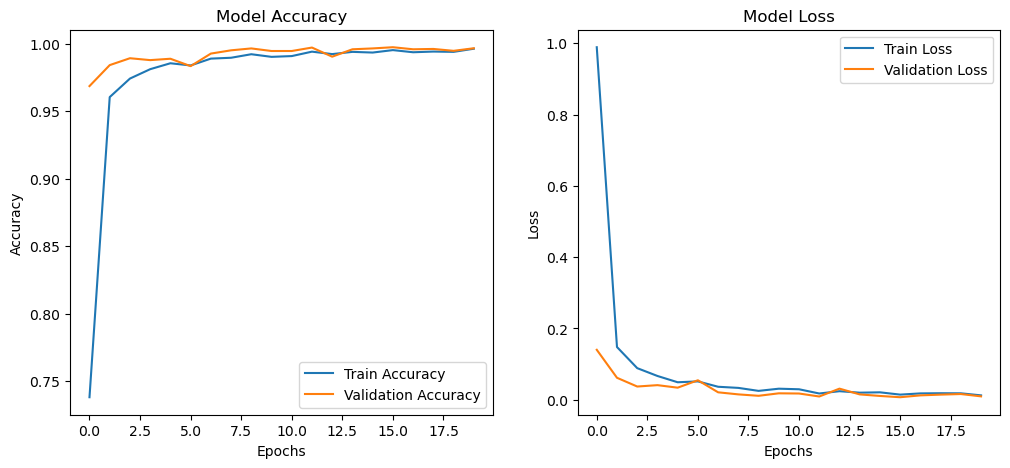

In [21]:
import matplotlib.pyplot as plt

# Get training history
history_dict = history.history

# Plot accuracy
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")

# Plot loss
plt.subplot(1,2,2)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")

plt.show()


In [22]:
# Save the trained model
model.save("traffic_sign_cnn_model.h5")

print("\nModel saved successfully as 'traffic_sign_cnn_model.h5'")



Model saved successfully as 'traffic_sign_cnn_model.h5'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


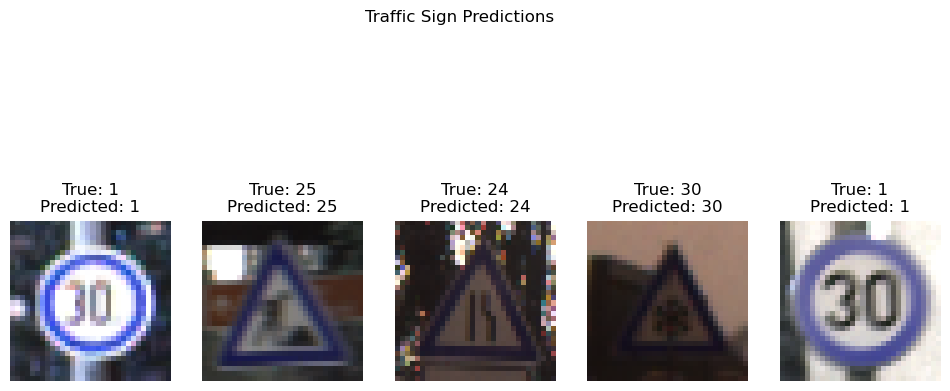

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# loading the model that we have saved
from tensorflow.keras.models import load_model
model = load_model("traffic_sign_cnn_model.h5")

# randomly selecting 5 images
num_samples = 5
random_indices = np.random.choice(len(X_test), num_samples, replace=False)

# Getting sample images and true labels
sample_images = X_test[random_indices]
sample_labels = np.argmax(y_test[random_indices], axis=1)  # Convert one-hot back to class ID

# Make predictions
predictions = np.argmax(model.predict(sample_images), axis=1)

# plotting the graph result
plt.figure(figsize=(12,6))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(sample_images[i])
    plt.axis("off")
    plt.title(f"True: {sample_labels[i]}\nPredicted: {predictions[i]}")
plt.suptitle("Traffic Sign Predictions")
plt.show()


In [25]:
!pip install streamlit tensorflow opencv-python numpy pillow